## Netflix Data Visualization project

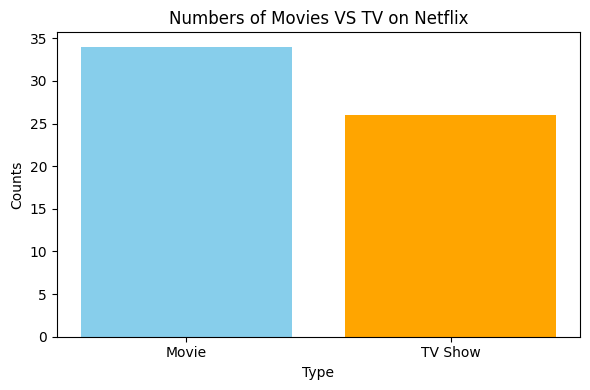

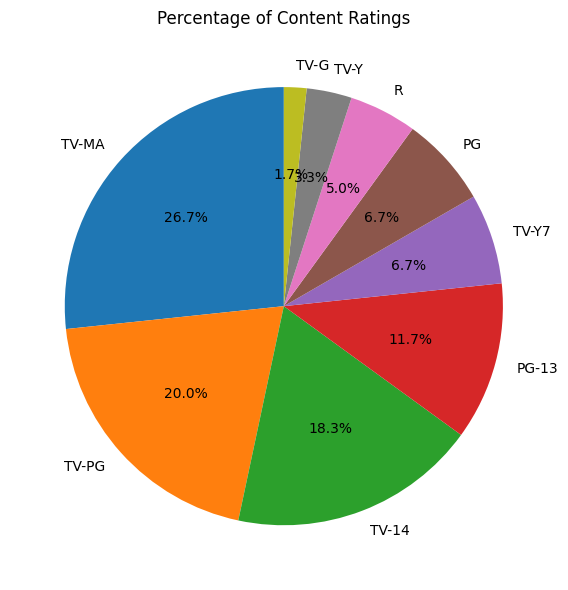

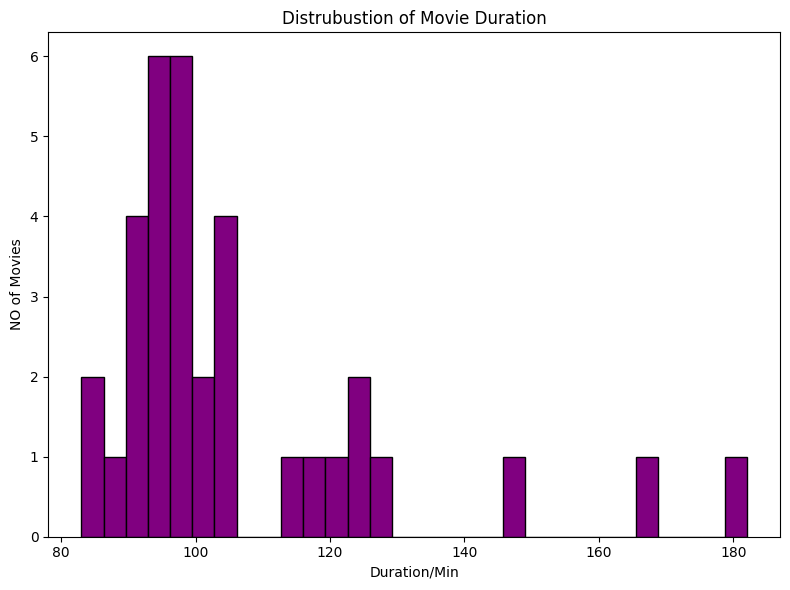

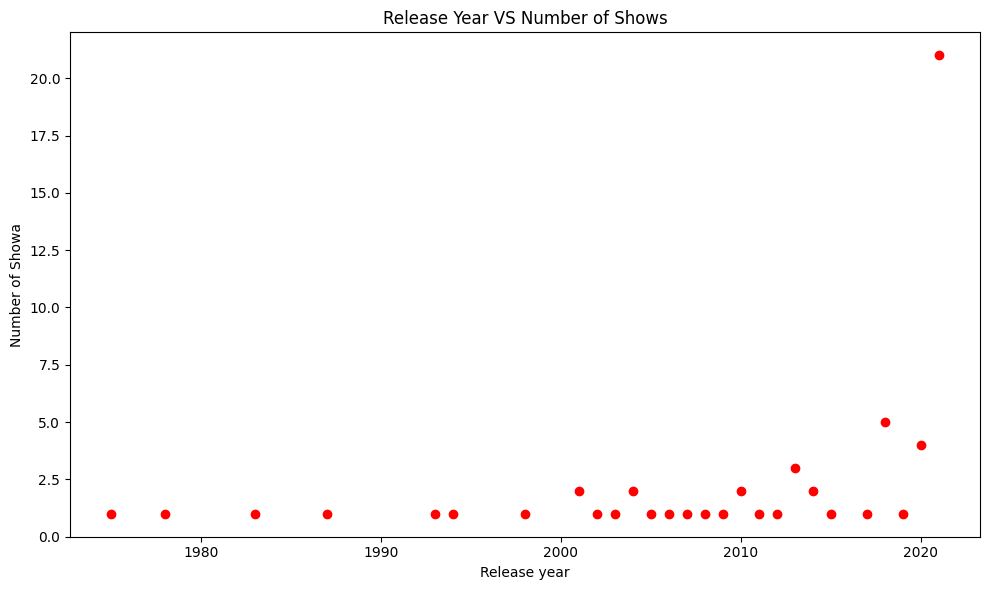

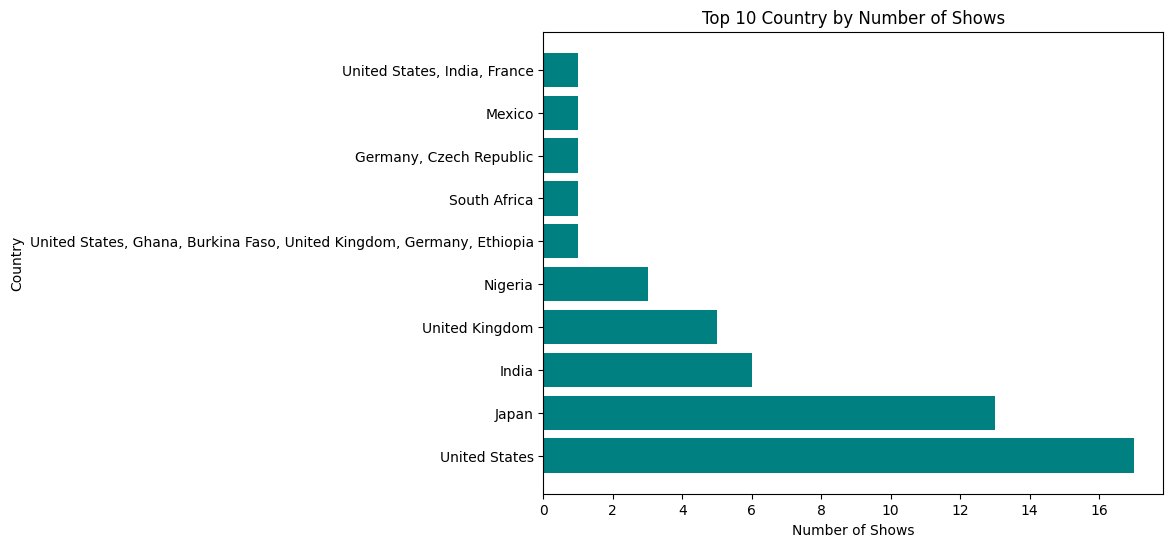

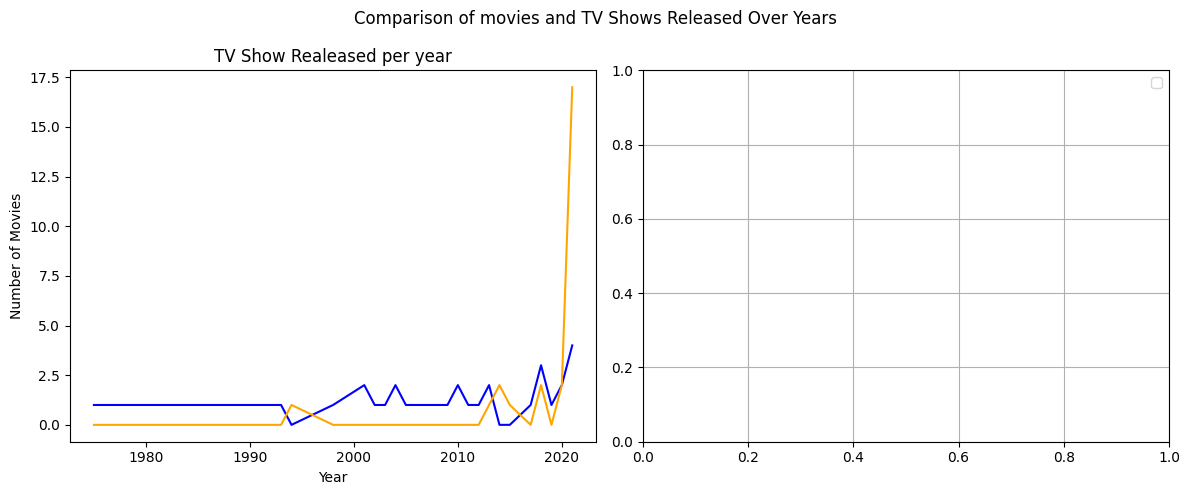

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
# load data
df = pd.read_csv('datalab_export_2025-11-23 13_47_40.csv')
# print(df.head)
#  clean data
df = df.dropna(subset=['type','country','release_year','rating','duration'])
type_counts =df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values, color=['skyblue','orange'])
plt.title('Numbers of Movies VS TV on Netflix')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('movies_tv.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_ratings.png')
plt.show()

movie_df =df[df['type']== 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30, color='purple', edgecolor='black')
plt.title('Distrubustion of Movie Duration')
plt.xlabel('Duration/Min')
plt.ylabel('NO of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')


release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release year')
plt.ylabel('Number of Showa')
plt.tight_layout()
plt.savefig('releaseY_noShow.png')
plt.show()


country_counts =df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values, color='teal')
plt.title('Top 10 Country by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.savefig('top10_countries.png')

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig , ax =plt.subplots(1,2, figsize=(12,5))
# First subplot::Movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue',label='Movies')
ax[0].set_title('Movies Realeased per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
#  Second Subplot:: TV Shows
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='orange',label='TV Show')
ax[0].set_title('TV Show Realeased per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

fig.suptitle('Comparison of movies and TV Shows Released Over Years')
plt.legend('upper left')
plt.grid(True)

plt.tight_layout()
plt.savefig('Movies_TV_Comparison.png')
plt.show()

